## Examing how the belonging intervention impacts student GPA in different context, and if student minoritized status moderates its effects on GPA 

<br>*Ketura Elie*

## Background

The college transition can be difficult for students. According to Education Data (2019), the overall dropout rate for undergraduate college students in the U.S. is 40%, with 30% of first-year students dropping out before their second year of college. In their first year, students tend to struggle with their academics in addition to connecting with their institution (Malinga-Musamba, 2014), and this has implications for students' belonging uncertainty. A growing body of research on a brief, carefully-time social belonging intervention has found increasing sense of belonging can bolster academic outcomes for students dealing with belonging uncertainty (Walton & Cohen, 2011; Shnabel et al., 2013). These interventions aim to help students view the challenges of transitioning to college as normal and serviceable. Results have found that while the interventions are generally beneficial, they are most beneficial for students who are members of many ethnic/racial minority groups (Walton et al., 2011; Shnabel et. al, 2013). 

Currently at the University of Pittsburgh (Pitt), approximately 34% of the student body is non-white. 8.92% are Asian, 4.78% are Black or African American, and 4.51% are Hispanic or Latino (Data USA: University of Pittsburgh). A belonging intervention was administered to students who started in the Fall of 2019, and this project seeks to examine if the effects of the belonging intervention will replicate at Pitt. Given that past work have foumd the belonging intervention to be effective, is important to test if it continues to be in various academic contexts.


## Method

Participants were University of Pittsburgh first-year students who metriculated in Fall of 2019. At the start of the semester, students received an email titled “What Is It Like To Come To Pitt?” a link to a qualtric survey with the following description
> *This activity will give you an opportunity to learn more about students’ experiences coming to Pitt. Because we value your point of view, we’ll also ask you to share your thoughts and feelings about coming to the University of Pittsburgh. We want to learn more about your and other students’ perspectives so we can give future Pitt students better insight into what coming to college is like.*

Students then answered two questions asking about if they feel welcomed so far at Pitt and if they are excited to come, and then were randomly assigned to either a control or the belonging intervention.

**Belonging Intervention**: Participants read nine representative stories. These representative narratives were short anecdotes from previous Pitt students detailing the adversities they faced and how they overcame them, thus portraying social adversity in academic settings as shared, temporary, and short lived. Next, the participants were asked to describe the thoughts, feelings, and worries they have as they prepare to come to Pitt with the following prompt(s):
> 1. “Worries you have about fitting in and belonging as you prepare to come to Pitt.”
> 2. “Why these worries are likely to be common when students first go to college.”
> 3. “Why students typically feel more at home on campus with time.”
> 4. “What students do to feel more at home, e.g., as they get to know friends and professors.” 

We told the participants that their essay may be provided, anonymously, to incoming Pitt students in future years to help give them a better understanding of what coming to college is like. The purpose of this affirmation exercise is to manipulate participants' sense of belonging.

**Control condition**: Participants read seven representative stories from older Pitt students that described different aspects of living in Pittsburgh, such as the weather, transportation system, and Pitt’s architecture. Next participants were given the same writing prompts as the belonging intervention, except participants were expected to write about adjusting to the campus environment and city of Pittsburgh (unlike the participants in the belonging intervention who were expected to write about facing and overcoming adversities related to belonging in college).

After going through the condition items participants were randomized to, *all* participants went on to completed another set of survey items including:3 items that measured sense of belonging and demographic measures for Race and Ethnicity.

## Variables


**`EMPLID_H`**: Anonymize participant identification. This participant ID was later linked to student first-year GPA.

#### _Main Variables of Interest_
1. **`condition`** (*factor - Dummy coded*): The condition participants were randomly assignment to 
>0: Control group 
><br>1: Belonging intervention

2. **`minoritize_status`** (*factor - Dummy coded*): Minority status of students calculated from self-reported Race and Ethnicity 
 > 0 is Non-minoritized (White)
 > <br> 1 is Minoritized (Asian, Black, Hispanic)

3. **`GPA`** (*numeric*): Student GPA at the end of their first-year (Fall 2019 - Spring 2020). This was obtained from the University of Pittsburgh datawarehouse and linked to their survey data using a third-party company to maintain anonymity.

*Other*: **`sense_of_blng`** (numeric): this a variable created from averaging the responses to the 3 belonging items below (per participants):
> 1. "How much do you think you will feel you fit in at Pitt when you arrive on campus this fall?"
> 2. “How much do you think you will feel you belong at Pitt when you arrive on campus this fall?”
> 3. “How much do you think you will feel at home at Pitt when you arrive on campus this fall?”
>
> All three items were all recorded with a seven-point Likert scale ranging from “Not at all”(1) to “An extreme amount” (7). This sense of belonging inventory ($\alpha$ = .90) was reliable.

Though this variable is not included in the hypotheses, it is included in the `blngdata` data because I wanted to get a glimpse of students' sense of belonging. I also wanted to examine the distribution of this variable between the two groups because according to the literature, this is the key to the intervention working &mdash;  by increasing belonging certainty for students. Thus if the findings from past work hold and the intervention in the study was effective, there should be a difference in the sense of belonging between students who received the belonging intervention and those who received the control. **This variable was not selected for the final tidy-compliant data used for statistical analysis.**

## Hypotheses

**Research Question 1a**: Does receiving the Belonging intervention improve student GPA?

$$ H_{1a} : Y_{GPA} = {\beta}_0 + {\beta}_1X_{Intervention}$$

It is hypothesized students who receive the Belonging intervetion will have higher GPAs than the students who did not. 

**Research Question 1b**: Does student minoritized status impact the effects of the Belonging intervention?

$$ H_{1b}: Y_{GPA} = {\beta}_0 + {\beta}_1X_{Intervention} + {\beta}_2M_{o\;Minoritized\,Status} + {\beta}_3X_{Intervention}M_{o\;Minoritized\,Status}$$

It is hypothesize that the effects of the belonging intervention on student GPA are moderated by student minoritized status.

<figure>
<img src="moderation.png" alt="Drawing" style="width: 800px;"/>
    <center><figcaption align = "bottom" > <b><i>Fig.1</b></i> Moderation Model </figcaption></center>
</figure>


## Data Organization

#### Data Architecture
 - Structure Type: Tabular Data (`.csv` file)
 - Data Pipeline: 
      **Collected** from Qualtrics → Copied raw data `.csv` file to local hard drive on computer → **Refined** (Data Cleansing & Tidying) → **Store** to local hard drive and project directory → **Analyze** (Statiscal Plan)
      
#### Data Cleansing, Manipulation,  & Tidying
 1. Import copy of raw data (included 1123 observations and 160 variables)
 2. Mutate Race and Ethnicity variable to new Dummy Coded `minoritize_status` variable
 3. Mutate the 3 sense of belonging items by taking the mean and creating new `sense_of_belonging` variable
 4. Selected all other variables of interest in addition to the 2 created variables above
 5. Converted `EMPLID_H` (participant ID variable) from strings to intergers
 6. Removed all particpants with missing values for variables of interest
 7. Removed 1 participants with GPA (dependent variable) of 0.00 as this was an integrity constraint violations
 8. Saved dataframe as new .csv file (include 520 observations with 5 variables)

### Resulting Tidy-Compliant Data Table

In [2]:
blngdata <-read.csv("~/Documents/Elie_DSPN_S22/Final_Project/cleaned_blng19.csv")
tidydf <- blngdata %>% select (EMPLID_H,minoritize_status,condition,GPA)
head(tidydf)

,EMPLID_H,minoritize_status,condition,GPA
,<int>,<int>,<chr>,<dbl>
1,318,1,CONTROL,2.714
2,390,0,CONTROL,3.327
3,200,1,CONTROL,0.917
4,305,1,STANDARD,3.635
5,307,0,STANDARD,3.554
6,279,0,STANDARD,2.615


## Analysis

### Statistical Plan
1. Descriptive statistics and visualizations of GPA, Sense of Belonging, and Minoritize Status
 - Using **`blngdata`** data table for step 1, everything else will use **`tidydf`** data table
2. General Linear Model for Inference
 - Bayes Factor
 - Boostrap
3. Moderation Model for Inference

### Descriptive Statistics and Visualizations of Student GPA, Sense of Belonging, and Minoritize Status

In [1]:
#library setup
library(tidyverse) |> suppressMessages()
library(ggpubr)
library(ggplot2)
library(gtsummary)  |> suppressMessages()
library(gridExtra) |> suppressMessages()
library(grid)
library(gtable) |> suppressMessages()
library(boot) |> suppressMessages()

In [1092]:
#setting condition as factor
blngdata$condition <- as.factor(blngdata$condition)
#levels(blngdata$condition) #checking that levels are control , standard (which is the intervention)
levels(blngdata$condition) <- c(0,1)

ctrl_group <-filter(blngdata, condition == "0")
trt_group <-filter(blngdata, condition == "1")

#total
total_gpa <-group_by(blngdata) %>% summarize (
    N = n(),
    Mean = mean(GPA),
    SD = sd(GPA),
    Min = min(GPA),
    Max = max(GPA))

#control group gpa
control_gpa <-group_by(ctrl_group) %>% summarize (
    N = n(),
    Mean = mean(GPA),
    SD = sd(GPA),
    Min = min(GPA),
    Max = max(GPA))

#intervention group gpa
trt_gpa <-group_by(trt_group) %>% summarize (
    N = n(),
    Mean = mean(GPA),
    SD = sd(GPA),
    Min = min(GPA),
    Max = max(GPA))

group_gpa <- rbind(control_gpa,trt_gpa)
desc_gpa <-rbind(group_gpa,total_gpa)
desc_gpa <-data.frame(round(desc_gpa, 3))
rownames(desc_gpa)=c("Control", "Belonging Intervention", "Total")

#total group belonging
total_blng <-group_by(blngdata) %>% summarize (
    N = n(),
    Mean = mean(sense_of_blng),
    SD = sd(sense_of_blng),
    Min = min(sense_of_blng),
    Max = max(sense_of_blng))

#control group belonging
control_blng <-group_by(ctrl_group) %>% summarize (
    N = n(),
    Mean = mean(sense_of_blng),
    SD = sd(sense_of_blng),
    Min = min(sense_of_blng),
    Max = max(sense_of_blng))

#intervention group belonging
trt_blng <-group_by(trt_group) %>% summarize (
    N = n(),
    Mean = mean(sense_of_blng),
    SD = sd(sense_of_blng),
    Min = min(sense_of_blng),
    Max = max(sense_of_blng))

group_blng <- rbind(control_blng,trt_blng)
desc_blng <- rbind(group_blng,total_blng)
desc_blng<- data.frame(round(desc_blng, 3))
rownames(desc_blng)=c("Control", "Belonging Intervention","Total")

In [1093]:
#distributions of gpa
p1 <- gghistogram(blngdata, x = "GPA", bins = 19,
       add = "mean", rug = TRUE , add_density = TRUE,
       fill = "condition", color="condition", 
       xlab = "Distrbution of Student First-Year GPA",
       alpha = .45) +
       scale_fill_manual(name = "Condition",
                         values = c("#7570B3", "#FC4E07"),
                         labels = c("Control", "Belonging Intervention")) +
       scale_color_manual(name = "Condition",
                          values = c("#7570B3", "#FC4E07"),
                          labels = c("Control", "Belonging Intervention")) +
       theme_minimal() +
       theme(axis.title.x = element_text(size=15,hjust = 0.5, face="bold"),
             axis.text.x = element_text(size=15,hjust = 0.5, face="bold"),
             axis.text.y = element_text(size=15,hjust = 0.5, face="bold"),
             axis.title.y = element_text(size=15,hjust = 0.5),
             legend.title = element_text(size=15,hjust = 0.5, face="bold"),
             legend.title.align = .65,
             legend.text = element_text(size=15,hjust = 0.48, face="bold"),
             legend.spacing.x = unit(1.0, 'cm'),
             legend.position = c(1,1.2),
             legend.direction = "horizontal",
             aspect.ratio =1)

#distribution of sense of belonging
p2 <- gghistogram(blngdata, x = "sense_of_blng", bins = 19,
       add = "mean", rug = TRUE , add_density = TRUE,
       fill = "condition", color="condition", 
       xlab = "Distribution of Student Sense of Belonging",
       alpha = .45) +
       scale_fill_manual(name = "Condition",
                         values = c("#7570B3", "#FC4E07"),
                         labels = c("Control", "Belonging Intervention")) +
       scale_color_manual(name = "Condition",
                          values = c("#7570B3", "#FC4E07"),
                          labels = c("Control", "Belonging Intervention")) +
       theme_minimal() +
       theme(axis.title.x = element_text(size=15,hjust = 0.5, face="bold"),
             axis.text.x = element_text(size=15,hjust = 0.5, face="bold"),
             axis.text.y = element_text(size=15,hjust = 0.5, face="bold"),
             axis.title.y = element_text(size=15,hjust = 0.5),
             legend.position = "none",
             aspect.ratio =1)

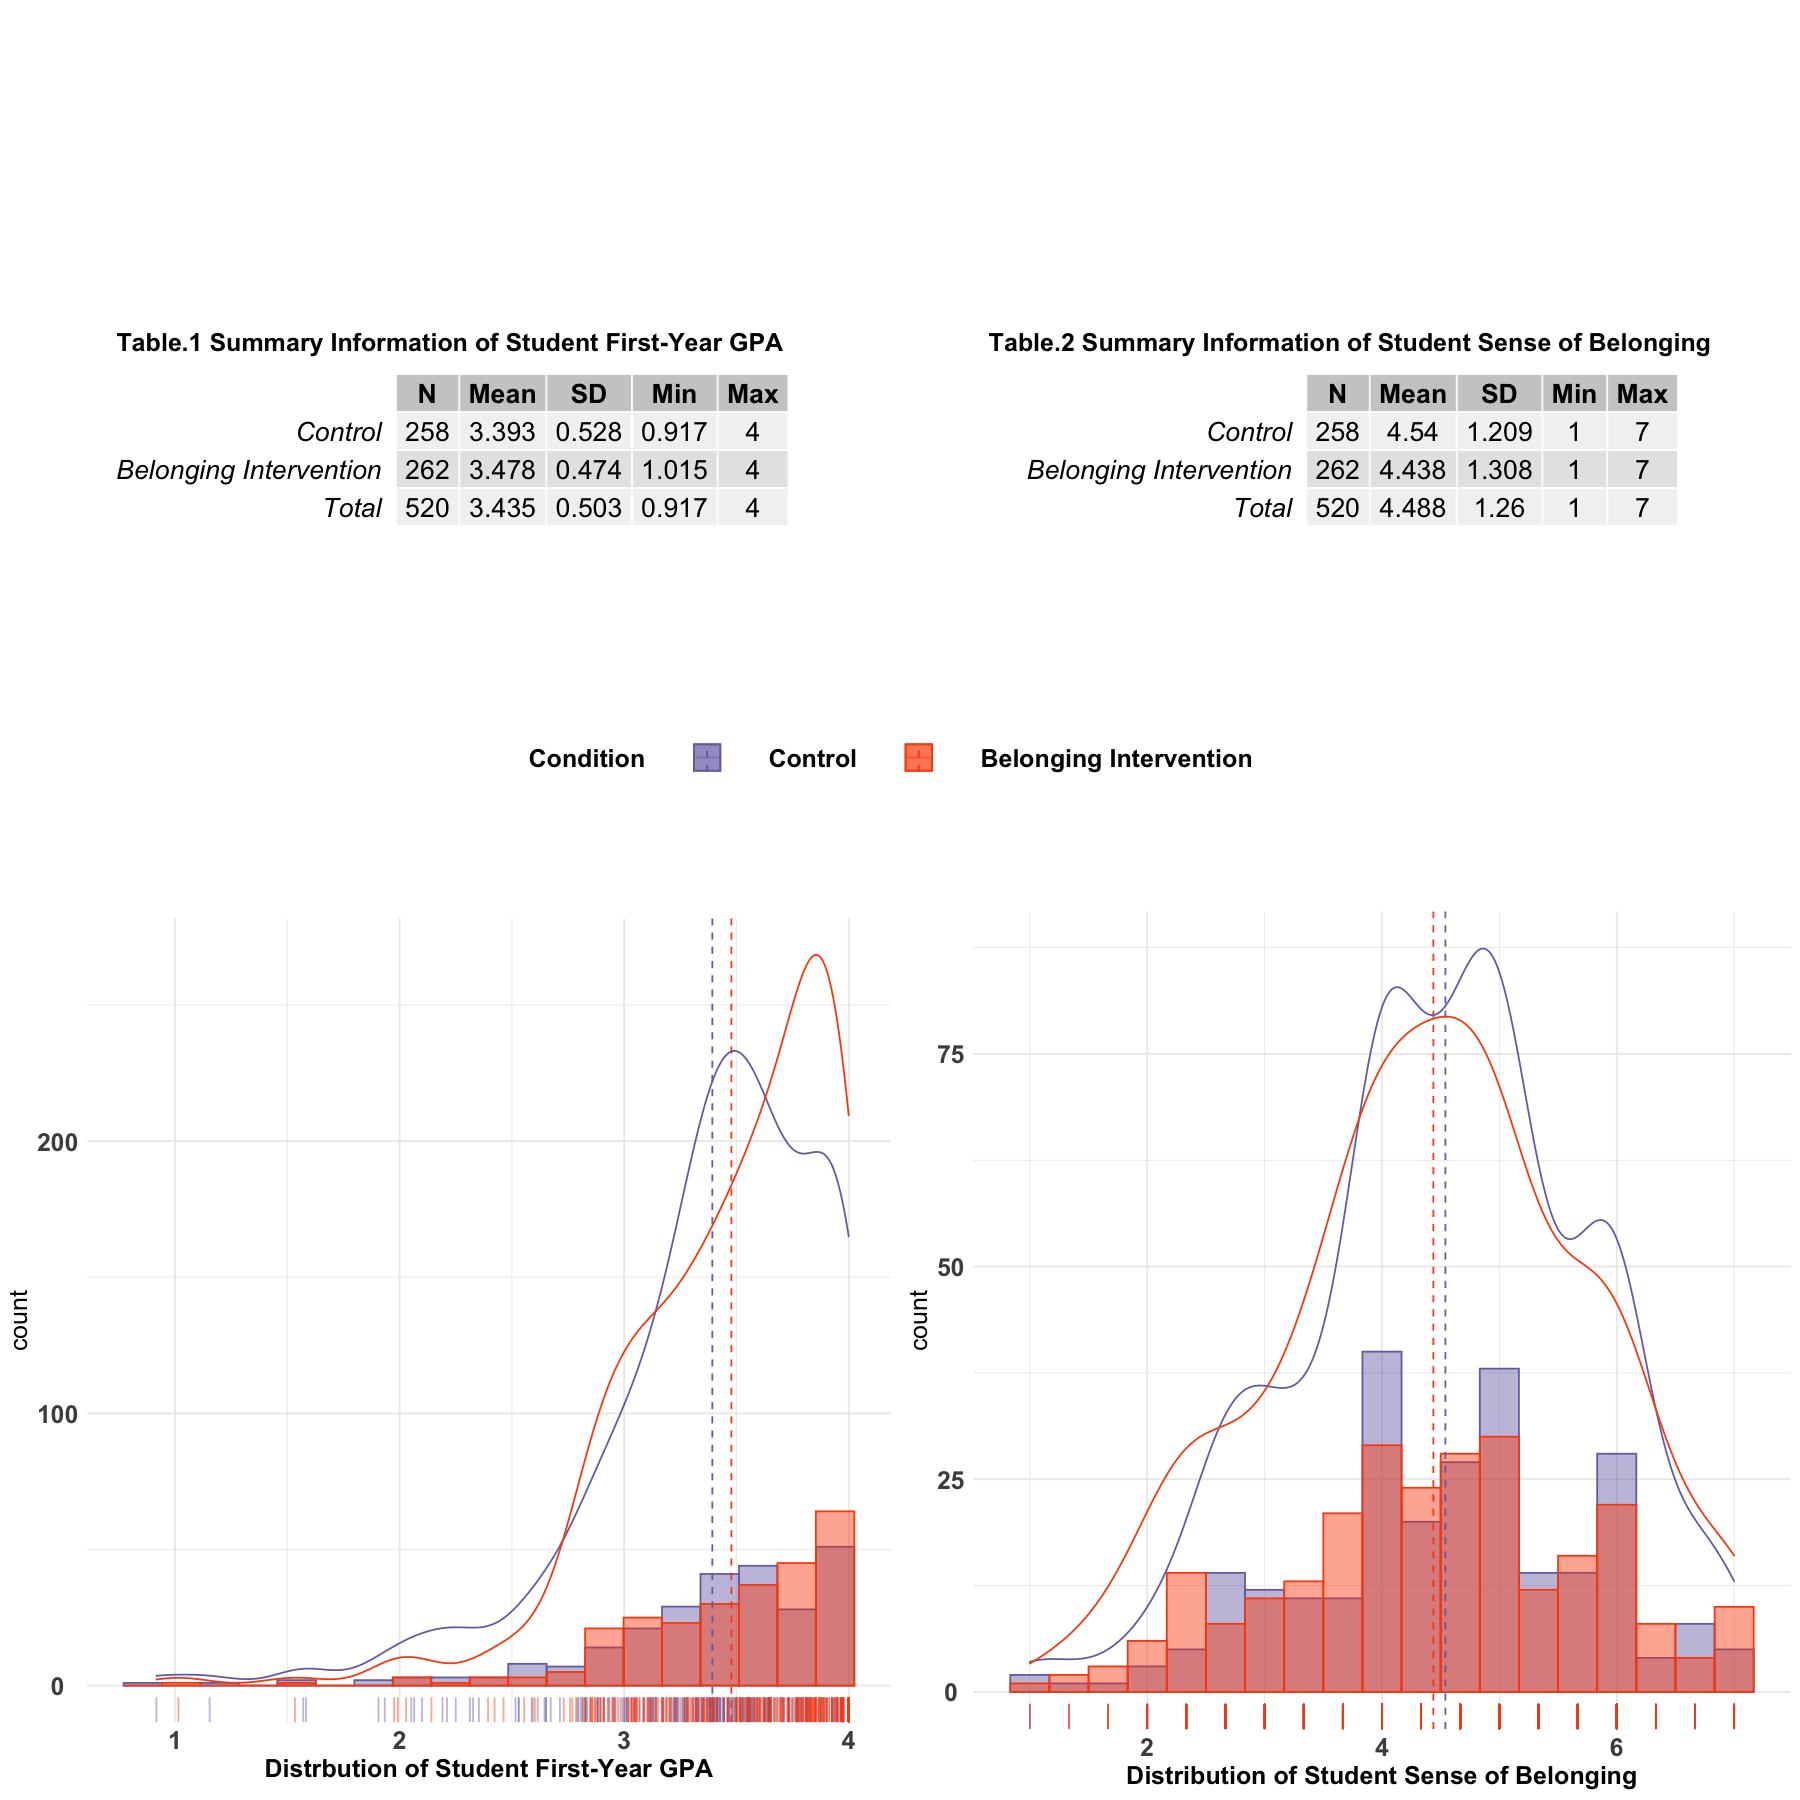

In [1094]:
options(repr.plot.width=15, repr.plot.height=15)
grid.arrange(
  tableGrob(desc_gpa[1:3, 1:5], theme=ttheme_default(16)),
  tableGrob(desc_blng[1:3, 1:5],theme=ttheme_default(16)),
    p1,p2,
    ncol=2) 
grid.draw(textGrob("Table.1 Summary Information of Student First-Year GPA", 
                   gp = gpar(fontsize = 15,fontface="bold"), x = unit(0.25, "npc"), y = unit(0.81, "npc")))
grid.draw(textGrob("Table.2 Summary Information of Student Sense of Belonging", 
                   gp = gpar(fontsize = 15, fontface="bold"), x = unit(0.75, "npc"), y = unit(0.81, "npc")))

The distribution of student GPA is highly skewed to the left with the majority of students with students in our sample
averaging at a GPA of 3.4. Both the control group and belonging intervention group have a similary left-skewed distribution for GPA. This has implications for running a general linear model because it violates the assumption that $Y$ is normally distributed. Also because both groups have similar distributions of GPA, it may be that the intervention did not have an effect.
<br>
The distribution for student sense of belonging looks normal. The students in the sample felt a moderate sense of belonging across both the control and the belonging intervention group (with students in the control group having a *slightly* higher sense of belonging). While sense of belonging is not a dependent variable I will examine, I decided to look at the distrubtion because according to the literature, there *should* have been a difference. As in, if the belonging intervention was effective, students who received it should have reported feeling a higher sense of belonging. I will continue with the rest of my analytic plan while filing this under a possible explanation if I fail to reject the $H_{1a0} : Y_{GPA} = {\beta}_0  $. Next I'll examine the distribution for Minoritized status.

In [1095]:
blngdata$EMPLID_H <- as.double(blngdata$EMPLID_H)
blngdata$minoritize_status <- as.factor(blngdata$minoritize_status)

In [1096]:
blngdata %>% group_by(minoritize_status) %>% summarize (
    N = n()) -> df3

trt_group %>% group_by(minoritize_status) %>% summarize (
    N = n()) -> df1

ctrl_group %>% group_by(minoritize_status) %>% summarize (
    N = n()) -> df2

#df1 Intervention 79 Minoritize 183 Non-Minoritize
#df2 Control 67 Minoritize / 191
#df3 Total 146 Minoritize

Mstatus <- data.frame(df1 = c(79,183,262),
                   df2 = c(67,191,258),
                   df3 = c(146,374,520))
colnames(Mstatus) = c("Belonging Intervention", "Control", "Total")
rownames(Mstatus) = c("Minoritized Status", "Non-Minoritized Status","Total")

In [1097]:
#distribution of minoritized students
p3 <- ggdensity(blngdata,
       x = "EMPLID_H", 
       facet.by = "minoritize_status",
       panel.labs = list(minoritize_status = c("Non-Minoritize Status", "Minoritize Status")),
       color = "condition", fill = "condition",               
       xlab = "Distribution of Students by Status", 
       add = "mean",                   
       alpha = .45) + xlim(1,520) +
       scale_fill_manual(name = " ",
                         values = c("#7570B3", "#FC4E07"),
                         labels = c("Control", "Belonging Intervention")) +
       scale_color_manual(name = " ",
                          values = c("#7570B3", "#FC4E07"),
                          labels = c("Control", "Belonging Intervention")) +
       theme_minimal()+ 
        theme(text = element_text(size=18,hjust = 0.5, face="bold"),
             axis.title.x = element_text(size=15,hjust = 0.5, face="bold"),
             axis.text.x = element_text(size=12,hjust = 0.5,face="plain"),
             axis.text.y = element_text(size=12,hjust = 0.5,face="plain"),
             axis.title.y = element_text(size=15,hjust = 0.5),
             legend.position = "top",
             legend.title = element_text(size=14,hjust = 0.5, face="bold"),
             aspect.ratio =1)
     

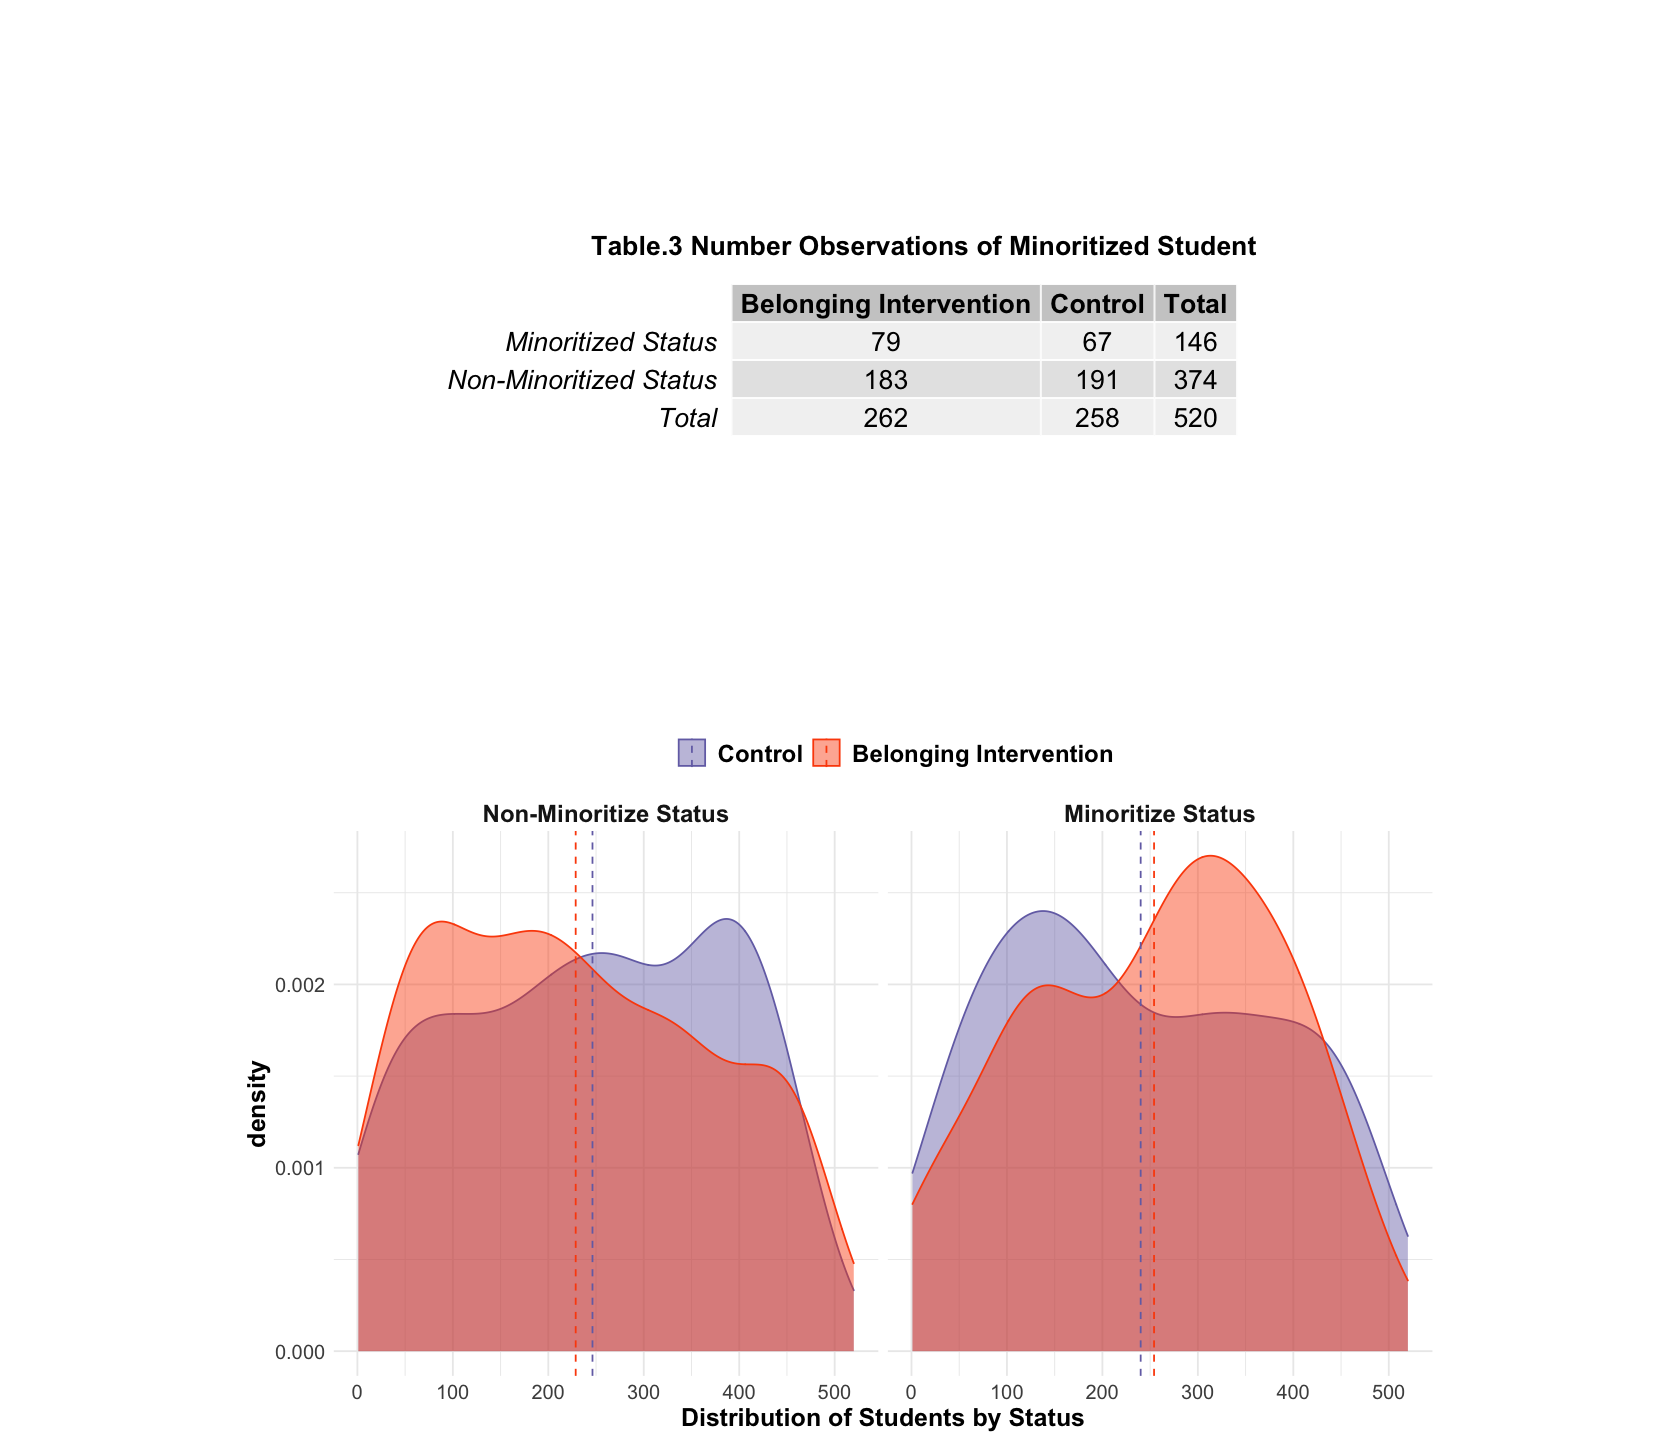

In [1098]:
options(repr.plot.width=14, repr.plot.height=12)
grid.arrange(
  tableGrob(Mstatus[1:3, 1:3], theme=ttheme_default(16)),
   p3) 
grid.draw(textGrob("Table.3 Number Observations of Minoritized Student", 
                   gp = gpar(fontsize = 16,fontface="bold"), x = unit(0.55, "npc"), y = unit(0.83, "npc")))

Overall there was a total of 146 minoritized students out of 520 participants, and 79 in the Belonging intervention. Students of minoritized and non-minoritized status were pretty evenly distributed across the control and belonging intervention group. Here is to take note for how much our sample size decrease by counting just minoritized students.  

### General Linear Model 
#### A priori setting an $\alpha$ threshold of $.05$

In [1099]:
#using tidydf datatable
#setting condition and minoritize status as factors
tidydf$condition <- as.factor(tidydf$condition)
levels(tidydf$condition) <- c(0,1)
tidydf$minoritize_status <- as.factor(tidydf$minoritize_status)
#levels(tidydf$minoritize_status) checked levels

tidydf$EMPLID_H <- as.double(tidydf$EMPLID_H)


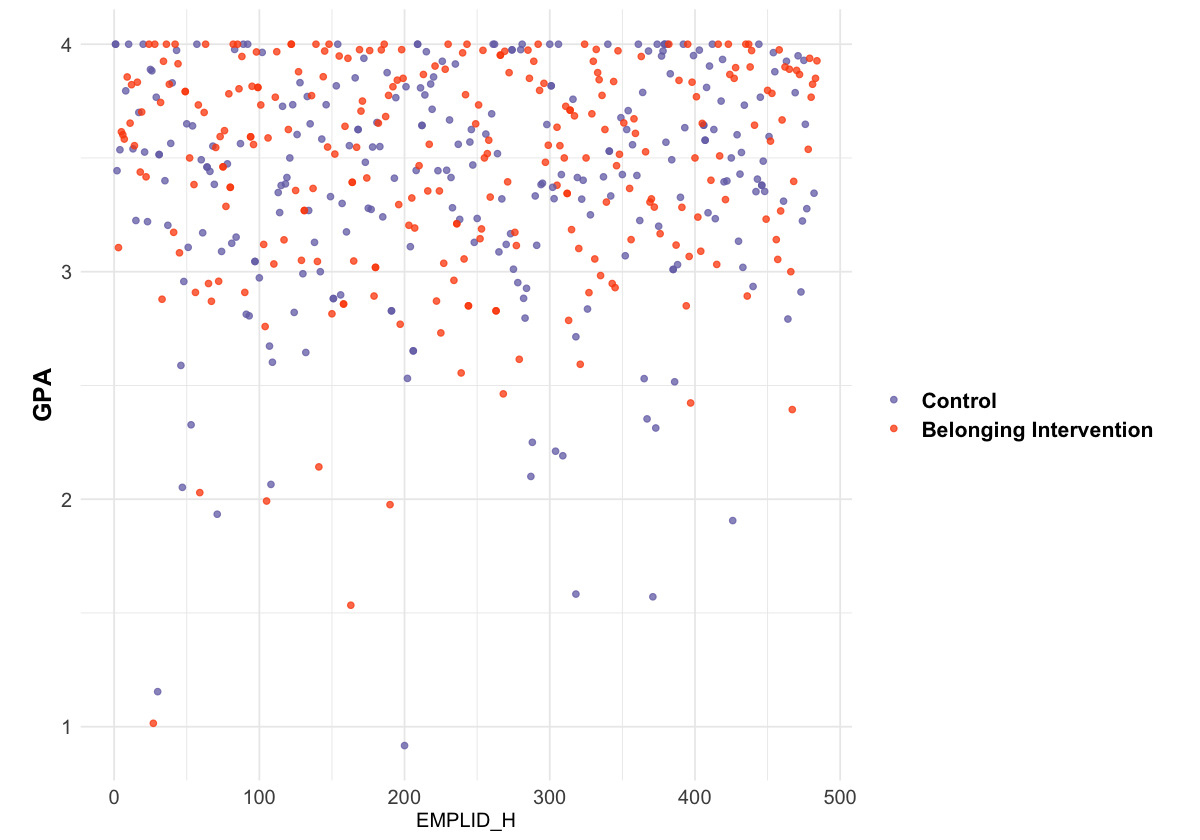

In [1100]:
options(repr.plot.width=10, repr.plot.height=7)
#visualizing data 
ggplot(tidydf, aes(x=EMPLID_H, y= GPA, color=condition)) + 
       geom_point(alpha=0.75) + 
       scale_color_manual(name = " ",
                          values = c("#7570B3", "#FC4E07"),
                          labels = c("Control", "Belonging Intervention")) +
       theme_minimal() +
       theme(text = element_text(size=16,hjust = 0.5, face="bold"),
             axis.title.x = element_text(size=12,hjust = 0.5, face="plain"),
             axis.text.x = element_text(size=12,hjust = 0.5,face="plain"),
             axis.text.y = element_text(size=12,hjust = 0.5,face="plain"),
             axis.title.y = element_text(size=15,hjust = 0.5),
             aspect.ratio =1)            

Attempting at visualizing the data in a way to help see a relationship between condition and GPA. GPA within both conidition is skewed, but doesn't seem different from each other. Possibly, the relationship betwen condition and GPA is weak or there is no relationship within this sample.

#### Residual Plots

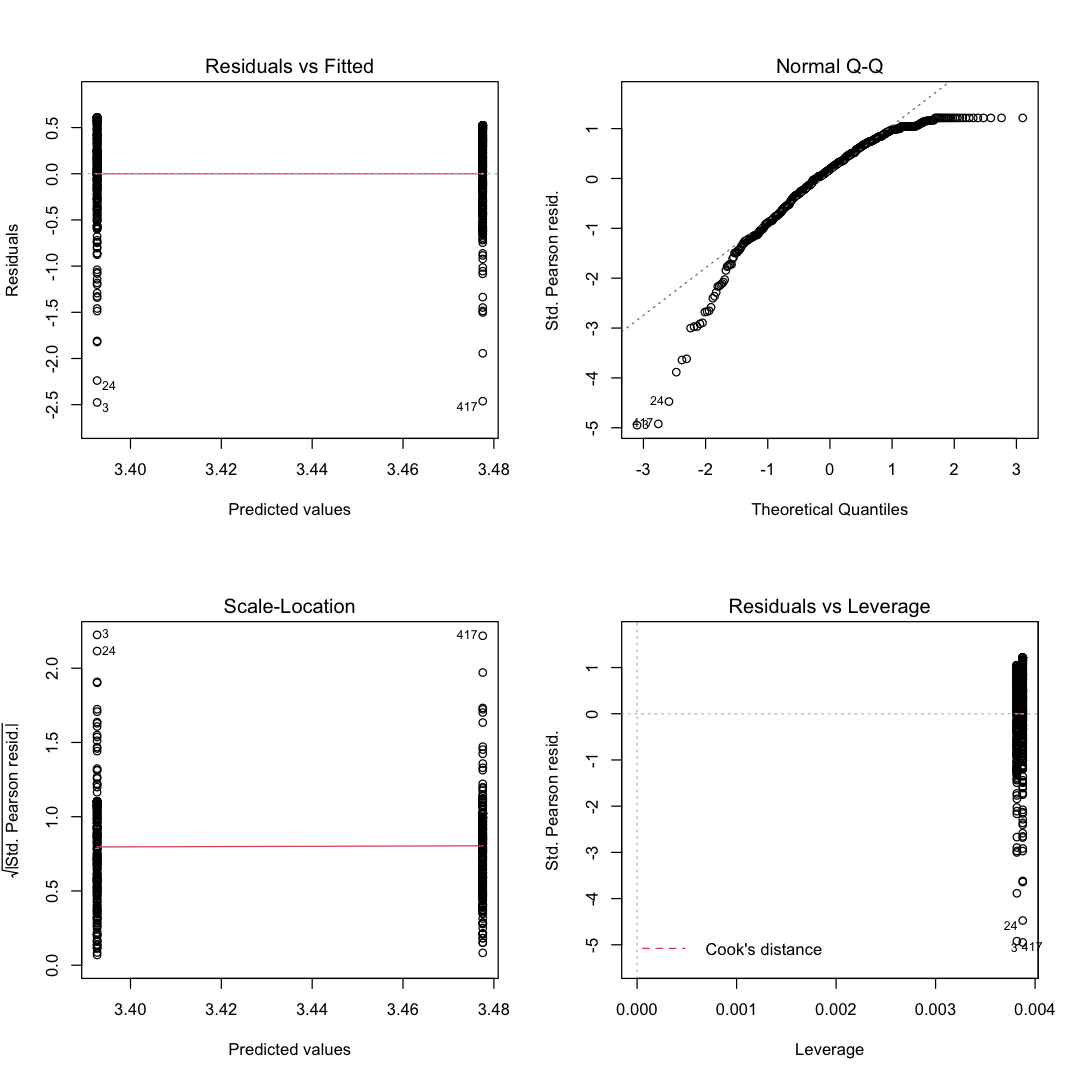

In [1090]:
options(repr.plot.width=9, repr.plot.height=9)
par(mfrow = c(2,2))
plot(lm.1)

The model did not meet some of the assumptions of linear regression. The model violated the assumption of the normality of $Y$ (as shown previously, GPA was highly left-skewed). While the model did not meet all the assumptions of linearity, I went ahead with the regression analyses base on previous work that shows belonging intervention improves students’ academic performance. Additionally, the study is a simple experiment designed to test if receiving he belonging intervention will have a improve student GPA.

In [ ]:
lm.1 = glm(GPA~condition, data=tidydf)
summary(lm.1) #extracted values
confint(lm.1, level=.95) #extracted values

In [ ]:
glm_table <- data.frame(variable = c("(Intercept)", "Belonging Intervention"),
                        b = c("3.39","0.08"),
                        SE = c("0.03","0.04"),
                        CI = c("[3.33,3.45]","[-0.00,0.17]"),
                        p = c("0.000***","0.054"))
colnames(glm_table) = c("Variable","b", "SE", "95% CI", "p")
rownames(glm_table) = c(" ","   ")
glm_table

In [1103]:
p5<-ggplot(tidydf, aes(x=EMPLID_H, y= GPA, color=condition)) + 
       geom_point(alpha=0.75) + geom_smooth(method=lm,formula='y~x') +
       labs(title="Student First year GPA per Condition", 
            x="Student ID", 
            y="Student GPA", 
            color="Condition") +
       scale_color_manual(name = " ",
                          values = c("#7570B3", "#FC4E07"),
                          labels = c("Control", "Belonging Intervention")) +
       theme_minimal() +
       theme(text = element_text(size=13,hjust = 0.5, face="bold"),
             plot.title = element_text(size=15,hjust = .5),
             axis.title.x = element_text(size=12,hjust = 0.5, face="plain"),
             axis.text.x = element_text(size=12,hjust = 0.5,face="plain"),
             axis.text.y = element_text(size=12,hjust = 0.5,face="plain"),
             axis.title.y = element_text(size=15,hjust = 0.5),
             aspect.ratio =1)

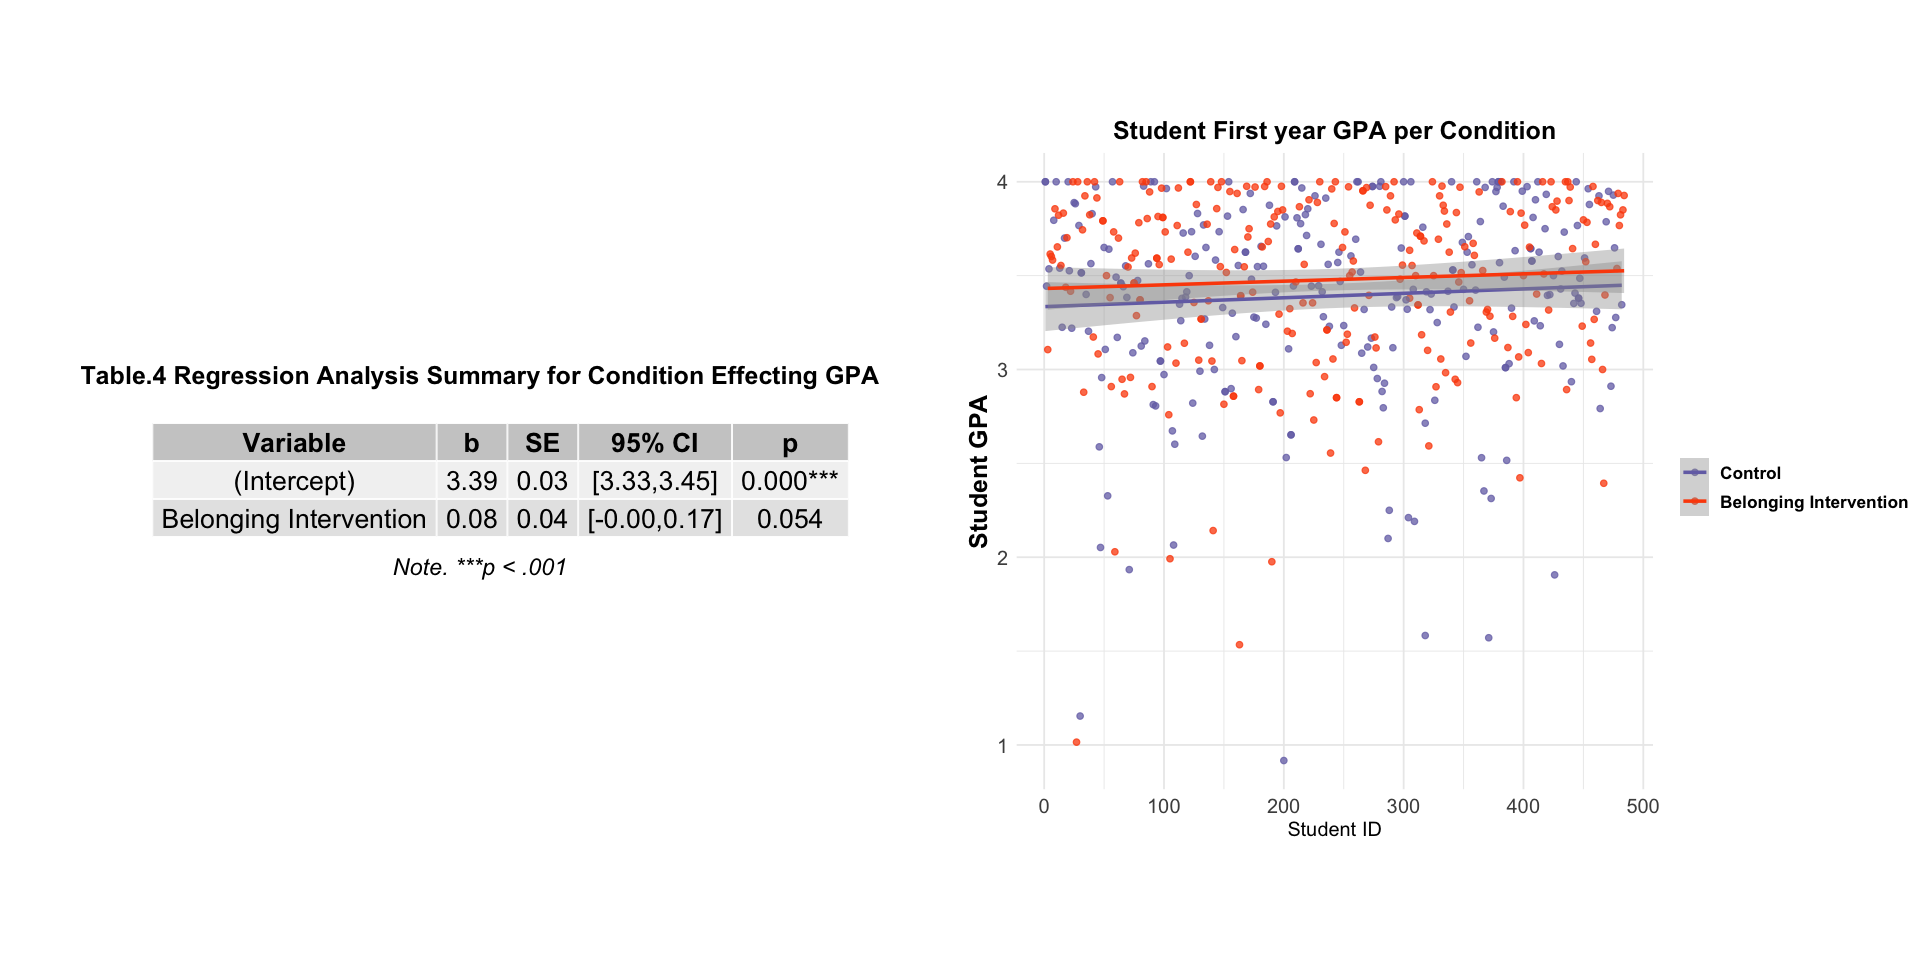

In [1104]:
options(repr.plot.width=16, repr.plot.height=8)
grid.arrange(
           tableGrob(glm_table[1:2, 1:5], theme=ttheme_default(16)),
           p5, 
           nrow=1) 
grid.draw(textGrob("Table.4 Regression Analysis Summary for Condition Effecting GPA", 
                   gp = gpar(fontsize = 15,fontface="bold"), x = unit(.25, "npc"), y = unit(0.61, "npc")))
grid.draw(textGrob("Note. ***p < .001", 
                   gp = gpar(fontsize = 14,fontface="italic"), x = unit(.25, "npc"), y = unit(0.41, "npc")))

#### Results of General Linear Model
The generalized linear model shows that there was no significant effect of the belonging intervention on student GPA. The intercept was significant (with a narrow 95%CI [3.33,3.45], indicating that GPA is still dependent on variable(s) that was not accounted for in the model (in other words the mean of $Y_{GPA}$ is not zero). The plot above shows that student GPA was fairly the same for students across the different groups.

### Bayes Factor

In [ ]:
library(BayesFactor) |> suppressMessages()

In [ ]:
#Kept getting error for running bayes factor with model in th glm structure
#Generating distribution for GPA, and 
#using ttestBF to compare GPA between condition and belonging intervention

#quick check of assumptions to run t-test
with(tidydf, shapiro.test(GPA[condition == "0"])) # not normally distributed but N per group is >20-30
with(tidydf, shapiro.test(GPA[condition == "1"])) # not normally distributed but N per group is >20-30
res.ftest <- var.test(GPA ~ condition, data = tidydf)
res.ftest #no significant difference between varaince in group

#	Shapiro-Wilk normality test

#data:  GPA[condition == "0"]
#W = 0.88216, p-value = 3.014e-13

#	Shapiro-Wilk normality test

#data:  GPA[condition == "1"]
#W = 0.88307, p-value = 2.623e-13

#	F test to compare two variances

#data:  GPA by condition
#F = 1.2433, num df = 257, denom df = 261, p-value = 0.08019
#alternative hypothesis: true ratio of variances is not equal to 1
#95 percent confidence interval:
# 0.974097 1.587228
#sample estimates:
#ratio of variances 
#          1.243283 

In [ ]:
# using n,mean,sd from the sample

set.seed(19)   
#gpa for control condition
intercept_control = data.frame(c_gpa=scale(rnorm(520, mean = 3.39, sd = .528)))

#gpa for belonging intervention
intercept_blng = data.frame(b_gpa=scale(rnorm(520, mean = 3.47, sd = .47)))

bf = ttestBF(x = intercept_control$c_gpa, y=intercept_blng$b_gpa, var.equal = TRUE,paired=FALSE)
#bf
#1/bf the relative evidence for the null hypothesis (no difference between condition)
print(paste("Relative edidence for the H1:",exp(bf@bayesFactor$bf)))
print(paste("Relative edidence for the null:",(1/exp((bf@bayesFactor$bf)))))


diffgpa = intercept_control$c_gpa - intercept_blng$b_gpa
#test a directional hypothesis ghat x (controlGPA) is less than y (belongGPA)
bfInterval = ttestBF(x = diffgpa, nullInterval=c(-Inf,0)) #here we test the hypothesis that the difference is less than 0
bfInterval

bfInterval[1]/bfInterval[2]


#### Results for Bayes Factor
The Bayes factor for the alternative ($H_{1}$) (versus the $H_{0}$) is .69. Evidence for the altnernative is much lower than for the $H_{0}$ (14.39), suggesting strong evidence for no difference in GPA between the conditions. 

The $BF_{01}$ is 1, that the difference scores are negative.

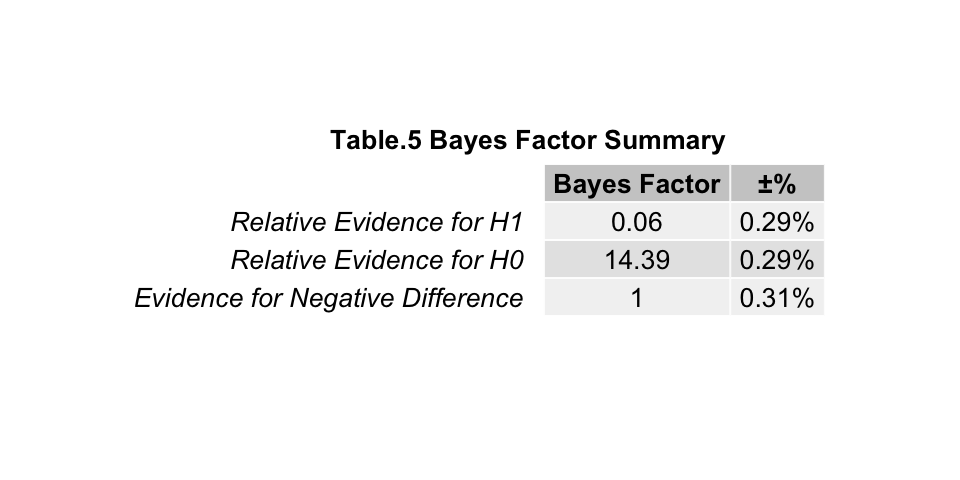

In [1106]:
options(repr.plot.width=8, repr.plot.height=4)
baesf_table <- data.frame(BayesFactor = c("0.06","14.39","1"),
                         plusminus = c("0.29%", "0.29%", "0.31%"))
colnames(baesf_table) = c("Bayes Factor", "±%") 
rownames(baesf_table) = c("Relative Evidence for H1","Relative Evidence for H0","Evidence for Negative Difference")
grid.arrange(
           tableGrob(baesf_table[1:3, 1:2], theme=ttheme_default(16)), 
           nrow=1) 
grid.draw(textGrob("Table.5 Bayes Factor Summary", 
                   gp = gpar(fontsize = 16,fontface="bold"), x = unit(.55, "npc"), y = unit(0.71, "npc")))

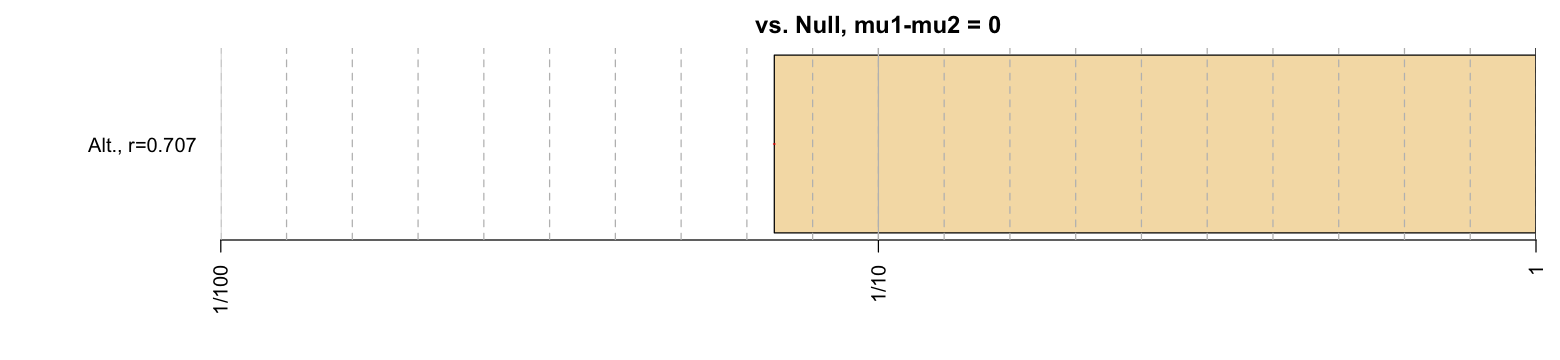

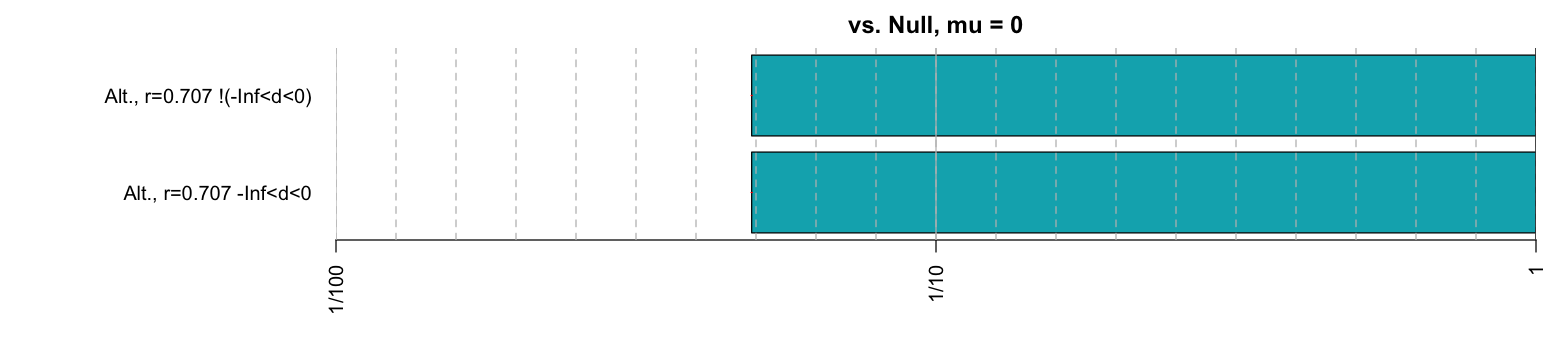

In [1107]:
#visualization
options(repr.plot.width=13, repr.plot.height=3)
par(mfrow = c(1,1))
plot(bf)

plot(bfInterval,
     col=c("#00AFBB"))
         

### Boostrap

In [9]:
library(boot);
set.seed(114)
boot.fn <- function(data, index){  
    return(coef(lm(GPA ~ condition, data=data, subset=index)))}

#print(summary(fitMod)$coefficient[4,4]) 
#print(boot.fn(tidydf, 1:520)) 

In [ ]:
boot_obj = boot(tidydf ,boot.fn ,R=1000) #R=repetitions 
print(boot_obj)
boot.ci(boot.out=boot_obj,conf=.95,type="norm")

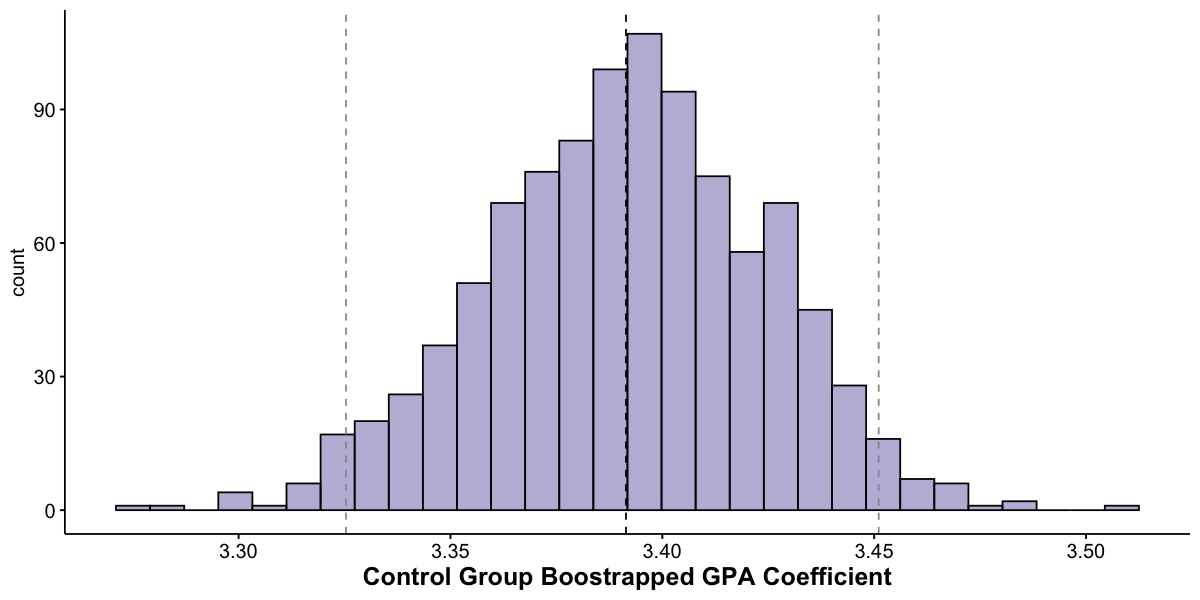

In [1110]:
options(repr.plot.width=10, repr.plot.height=5)
hist.fn <- function(i, title){
  # 95% interval
  bounds <- boot_obj$t[,i] %>% quantile(probs = c(.025, .975)) %>% as.numeric()
    p0 <- gghistogram(
    boot_obj$t[, i],
    xlab = title,
    bins = 30,
    fill = "#7570B3",
    alpha = .5,
    add = "mean"
    ) + 
    geom_vline(xintercept = bounds, color = "gray60", linetype = "dashed") +
    theme(axis.title.x = element_text(size=15,hjust = 0.5, face="bold"))
  
  print(p0)
}

hist.fn(1, "Control Group Boostrapped GPA Coefficient") |> suppressWarnings()

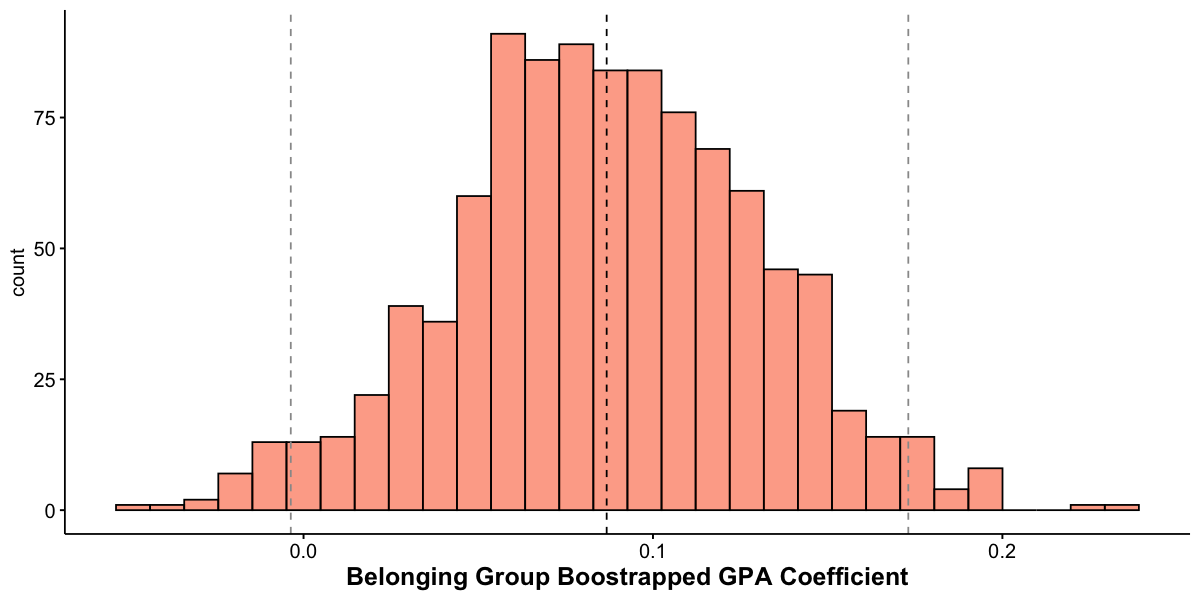

In [12]:
options(repr.plot.width=10, repr.plot.height=5)
hist.fn2 <- function(i, title){
  # 95% interval
  bounds <- boot_obj$t[,i] %>% quantile(probs = c(.025, .975)) %>% as.numeric()
    p9 <- gghistogram(
    boot_obj$t[, i],
    xlab = title,
    bins = 30,
    fill = "#FC4E07",
    alpha = .5,
    add = "mean"
    ) + 
    geom_vline(xintercept = bounds, color = "gray60", linetype = "dashed") +
    theme(axis.title.x = element_text(size=15,hjust = 0.5, face="bold"))
  
  print(p9)
}

hist.fn2(2, "Belonging Group Boostrapped GPA Coefficient") |> suppressWarnings()

In [ ]:
boot.ci(boot_obj, index = 1, type = "basic")
boot.ci(boot_obj, index = 2, type = "basic")

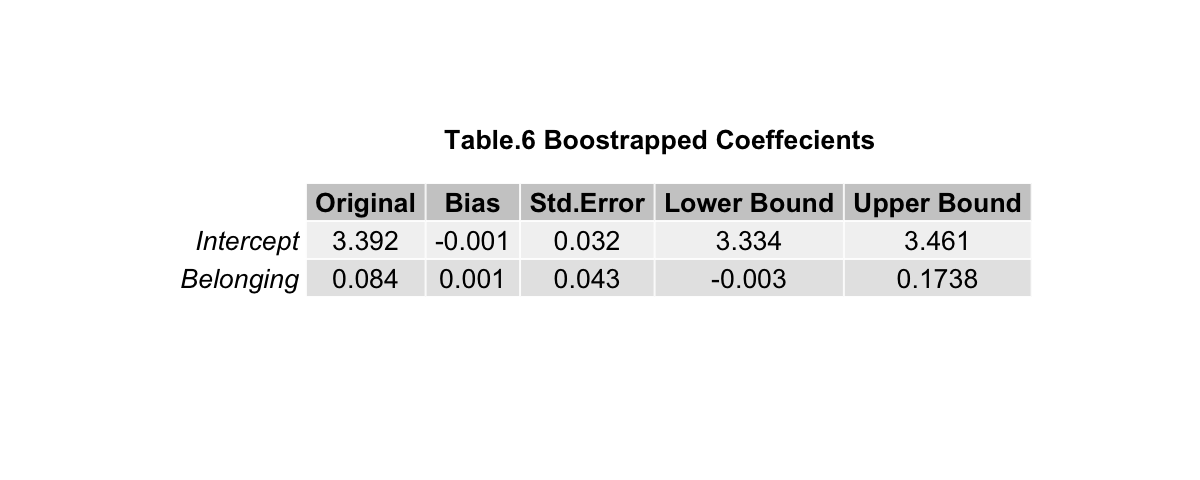

In [1108]:
options(repr.plot.width=10, repr.plot.height=4)
boot_table <- data.frame(original = c("3.392","0.084"),
                         bias = c("-0.001","0.001"),
                         std.error = c("0.032","0.043"),
                         lowerb = c("3.334","-0.003"),
                         upper = c("3.461", "0.1738"))
colnames(boot_table) = c("Original","Bias","Std.Error","Lower Bound", "Upper Bound") 
rownames(boot_table) = c("Intercept","Belonging")
grid.arrange(
           tableGrob(boot_table[1:2, 1:5], theme=ttheme_default(16)), 
           nrow=1) 
grid.draw(textGrob("Table.6 Boostrapped Coeffecients", 
                   gp = gpar(fontsize = 16,fontface="bold"), x = unit(.55, "npc"), y = unit(0.71, "npc")))

#### Result of Boostrap

Given our data, for students who have not received the belonging intervention, we expect to see a average mean GPA of 3.392 with 95%[3.334,3.461] certainty. For the effect of the belonging intervention on GPA, there was a 95%CI[-0.003,0.17], since this interval contains zero, finding group differences in the population is unlikely.

### Moderation Model

In [ ]:
fitMod = lm(GPA ~ condition + minoritize_status + condition*minoritize_status, tidydf)
summary(fitMod)
confint(fitMod,level=.95)

In [5]:
mod_table <- data.frame(variable = c("(Intercept)", "Belonging Intervention", 
                                     "Minoritize Status", "Condition*Minortize Status"),
                        b = c("3.44","0.06","-0.19","0.09"),
                        SE = c("0.03","0.05", "0.07","0.09"),
                        CI = c("[3.37,3.51]","[-0.03,0.16]","[-0.33,-0.05]","[-0.09,0.29]"),
                        p = c("0.000***","0.22", ".005**","0.307"))
colnames(mod_table) = c("Variable","b", "SE", "95% CI", "p")
rownames(mod_table) = c(" ","   ","     ","    ")
#mod_table 

In [6]:
my_comparisons <- list(c("0", "1"), c("OV", "LUSC"))
p6 <- ggboxplot(tidydf,
           x = "condition", y = "GPA",
           facet.by = "minoritize_status",
           panel.labs = list(minoritize_status = c("Non-Minoritize Status", "Minoritize Status")),
           color = "condition", fill = "condition",               
           xlab = "Distribution of Student GPA by Status",                   
           alpha = .45,
           add = "jitter",
           add.params = list(size = 0.1, jitter = 0.2),  
           repel = TRUE) + 
       scale_fill_manual(name = " ",
                         values = c("#7570B3", "#FC4E07"),
                         labels = c("Control", "Belonging Intervention")) +
       scale_color_manual(name = " ",
                          values = c("#7570B3", "#FC4E07"),
                          labels = c("Control", "Belonging Intervention")) +
       theme_minimal() +
       theme(text = element_text(size=18,hjust = 0.5, face="bold"),
             axis.title.x = element_text(size=15,hjust = 0.5, face="bold"),
             axis.text.x = element_text(size=12,hjust = 0.5,face="plain"),
             axis.text.y = element_text(size=12,hjust = 0.5,face="plain"),
             axis.title.y = element_text(size=15,hjust = 0.5),
             legend.position = "top",
             legend.title = element_text(size=14,hjust = 0.5, face="bold"),
             aspect.ratio =1)

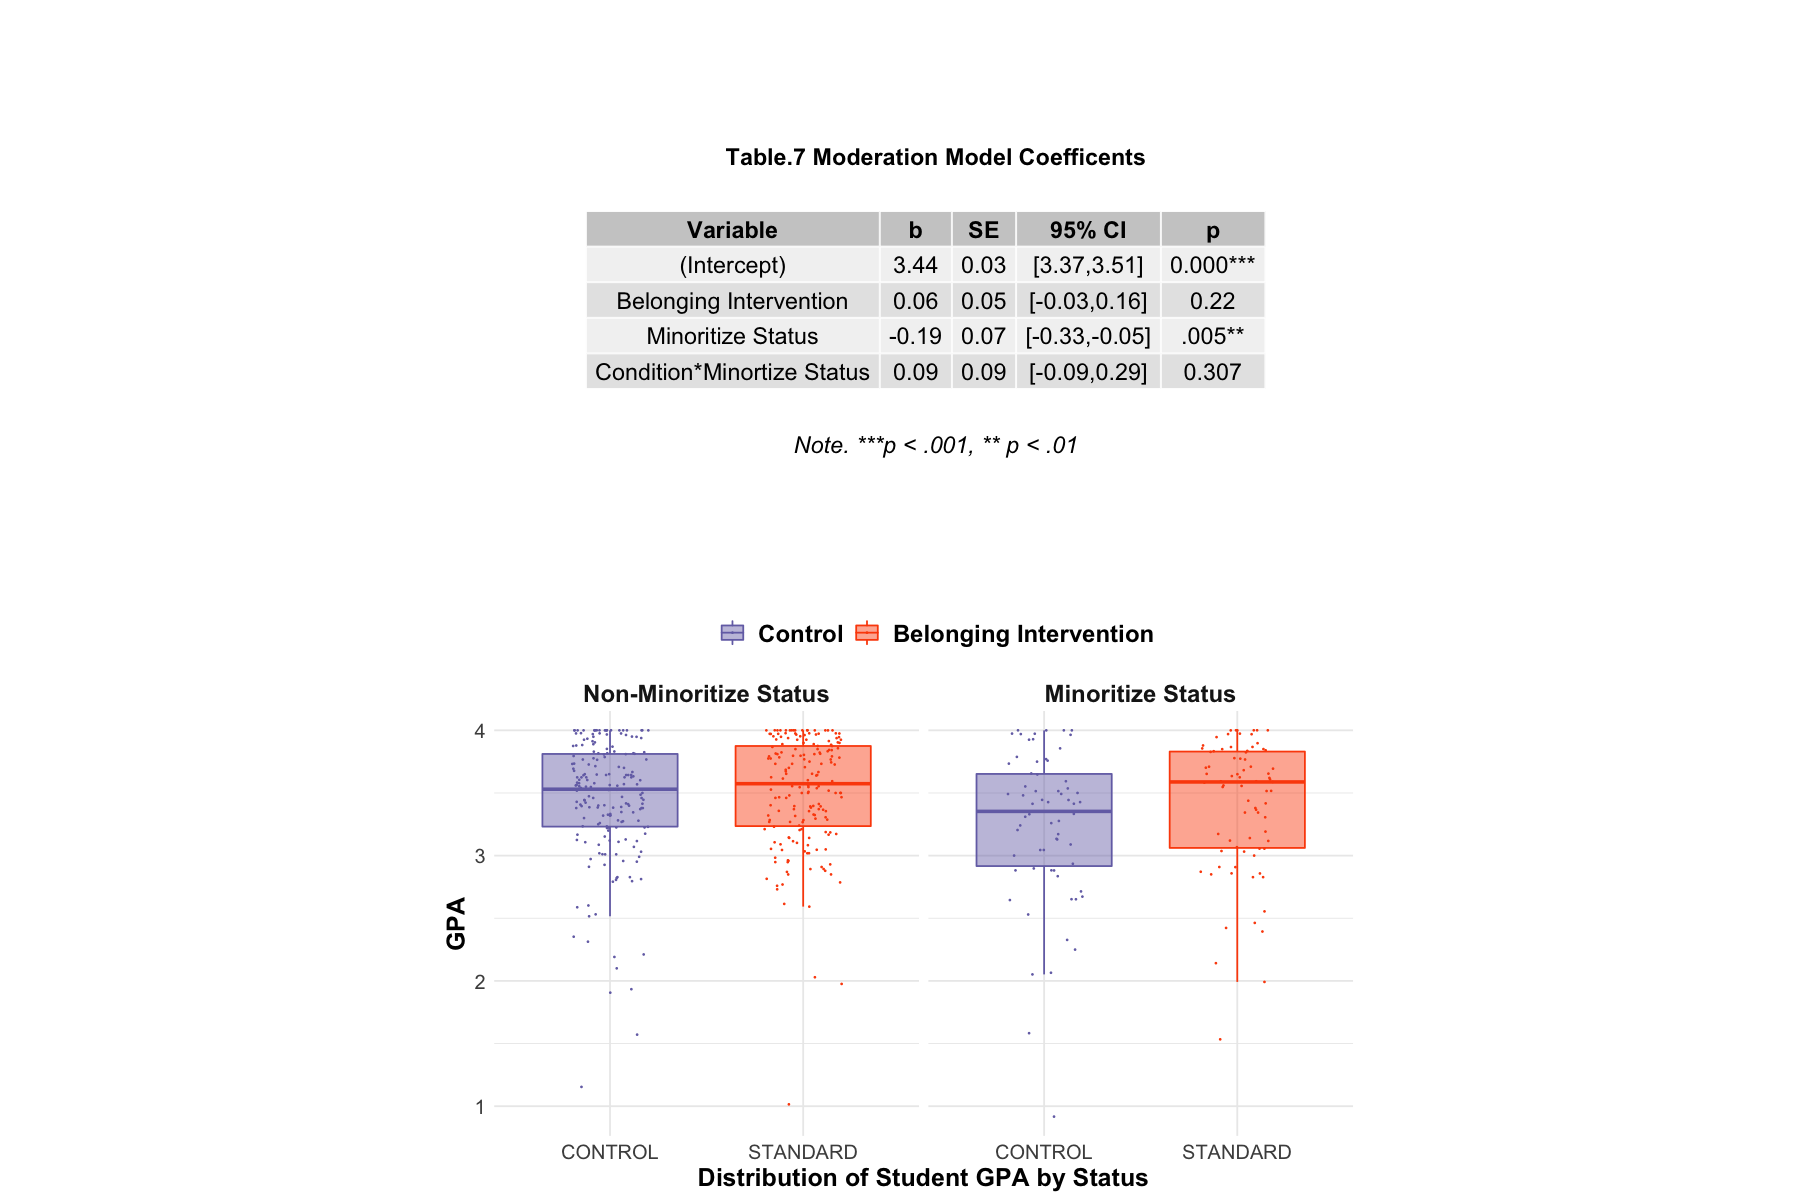

In [15]:
options(repr.plot.width=15, repr.plot.height=10)
grid.arrange(
           tableGrob(mod_table[1:4, 1:5], theme=ttheme_default(14)),
           p6, 
           nrow=2) 
grid.draw(textGrob("Table.7 Moderation Model Coefficents", 
                   gp = gpar(fontsize = 14,fontface="bold"), x = unit(.52, "npc"), y = unit(0.87, "npc")))
grid.draw(textGrob("Note. ***p < .001, ** p < .01", 
                   gp = gpar(fontsize = 14,fontface="italic"), x = unit(.52, "npc"), y = unit(0.63, "npc")))

#### Result of Moderation 
There was no significant moderation of minortize status on the effect of the beloning intervention on student GPA. Looking at a visualization of how GPA is distributed by minoritize status and condition, overall students had similar GPAs. Interestingly, there was significant main effect of minoritize status on student GPA (where minoritized students on average, had a lower GPA than non-minoritize students). This is visible in our plot as non-minoritize students in the belonging intervention group had slighty higher GPAs on average compared to minoritized students who received the belonging intervention. There was also significant intercept, indicating that GPA is still dependent on variable(s)  that was not accounted for in the model (in other words the mean of $Y_{GPA}$ is not zero). 

## Conclusions

For my first reseach question: $H_{1a} : Y_{GPA} = {\beta}_0 + {\beta}_1X_{Intervention}$, I did not find a significant effect of the belonging intervention improving student GPA. Bayes Factor suggest strong evidence there are is difference in GPA for students who received the belonging intervention compared to the students who did not. Boostrapping for effects of the intervention revealed a 95%CI of [-0.003,0.17], supporting that it is highly likely that there is no group difference in the population. For the second question: $ H_{1b}: Y_{GPA} = {\beta}_0 + {\beta}_1X_{Intervention} + {\beta}_2M_{o\;Minoritized\,Status} + {\beta}_3X_{Intervention}M_{o\;Minoritized\,Status}$, I did not find a significant moderation of student minoritize status on the effects of belonging intervention on student GPA. 
Examining the data closely, possible reasons for the null findings are: (1) the control group activity was just as effective at increasing student sense of belonging, thus there was no difference in student GPA, (2) the main variable of interest was highly left-skewed with all students having relatively high GPAs. In conclusion, perhaps the belonging intervention needs to be adjusted for the context at Pitt to differentially improve student outcome.

Reference
1. Malinga-Musamba, T. (2014). First-year course experience and college adjustment: A case study. Journal of Psychology in Africa, 24(3), 278-280. doi:http://dx.doi.org.pitt.idm.oclc.org/10.1080/14330237.2014.903067
2. National Center for Education Statistics. (n.d.). Retrieved March 20, 2022 from https://nces.ed.gov/
3. Shnabel, N., Purdie-Vaughns, V., Cook, J. E., Garcia, J., & Cohen, G. L. (2013). Demystifying values-affirmation interventions: Writing about social belonging is a key to buffering against identity threat. Personality and Social Psychology Bulletin, 39(5), 663-676. doi: 10.1177/0146167213480816
4. Walton, G. M., & Cohen, G. L. (2007). A question of belonging: race, social fit, and achievement. Journal of personality and social psychology, 92(1), 82.
5. University of Pittsburgh-Pittsburgh Campus. Data USA. (n.d.). Retrieved March 30, 2022, from 
https://datausa.io/profile/university/university-of-pittsburgh-pittsburgh-campus#:~:text=Enrollment%20by%20Race%20%26%20Ethnicity&amp;text=1%2C562-,The%20enrolled%20student%20population%20at%20University%20of%20Pittsburgh%2DPittsburgh%20Campus,Hawaiian%20or%20Other%20Pacific%20Islanders. 


Special shout-out to *Danielle Fox* and *Avital Pelakh* for their help throughout the semester ^-^